In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from PIL import Image
from PIL import ImageFilter

>
- Simple
- Compuesto
- Continuo

In [2]:

def intSimpleCapitalFinal(CapitalInicial, Intereses, Periodos):
    return CapitalInicial*(1+Intereses*Periodos)

In [3]:
listaDeIntereses = [.05,.1,.15,.2,.5]

In [4]:
# capital 10000
Periodos = 12
for Intereses in listaDeIntereses:
    print(intSimpleCapitalFinal(10000, Intereses, Periodos), end = " ")

16000.0 22000.0 28000.0 34000.0 70000.0 

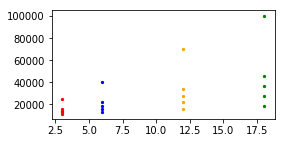

In [5]:
# capital 10000
Periodo = [3,6,12,18]
colores = ["red", "blue", "orange", "green"]
plt.figure(figsize = (4,2))
for indx, periodo in enumerate(Periodo):
    for Intereses in listaDeIntereses:
        capitalx = intSimpleCapitalFinal(10000, Intereses, periodo)
        plt.scatter([periodo], [capitalx], color = colores[indx], s = 5)

In [6]:
def intCompuesto(CapitalInicial, Intereses, Periodo):
    return CapitalInicial*(1+Intereses)**Periodo

In [7]:
#Capital 10000
Periodos = 12
for Intereses in listaDeIntereses:
    print(intCompuesto(10000, Intereses, Periodos), end = " ")

17958.5632602213 31384.283767210032 53502.50105473706 89161.00448255996 1297463.37890625 

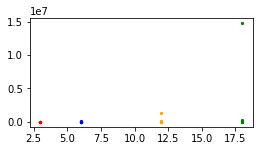

In [8]:
Periodo = [3,6,12,18]
colores = ["red", "blue", "orange", "green"]
plt.figure(figsize = (4,2))
for indx, periodo in enumerate(Periodo):
    for Intereses in listaDeIntereses:
        capitalx = intCompuesto(10000, Intereses, periodo)
        plt.scatter([periodo], [capitalx], color = colores[indx], s = 5)

In [9]:
#Actividad 1
# Resolver con 0.8% y 1% mensual
# Resolver con 11000 y 12000
# Capital iicial 10000

def periodo(CapitalInicial, CapitalFinal, Interes):
    ans = (CapitalFinal/CapitalInicial - 1)/Interes
    if ans == int(ans):
        return ans
    else:
        return int(ans)+1   

In [10]:
periodo(10000,11000, .008)

13

In [11]:
periodo(10000,12000, .01)

20

In [12]:
#Actividad 2

def periodoCompuesto (CapitalInicial, CapitalFinal, Interes):
    ans = np.log(CapitalFinal/CapitalInicial)/np.log(1+Interes)
    if ans == int(ans):
        return ans
    else:
        return int(ans)+1   

In [13]:
Co = eval(input("Escribe el capital que vas a Ahorrar: "))
Meta = eval(input("Escribe tu meta de ahorro: "))
i = eval(input("Escribe el Interes que tienes: "))
print("¡Tendras que dejar ahorrado tu dinero", periodoCompuesto(Co,Meta,i), "meses para alcanzar tu meta!")

Escribe el capital que vas a Ahorrar: 25
Escribe tu meta de ahorro: 522222
Escribe el Interes que tienes: 1
¡Tendras que dejar ahorrado tu dinero 15 meses para alcanzar tu meta!


In [14]:
def TiempoRestante(TemperaturaDePrediccion, TempAmbiente, TempInicialObjeto, TempObjetoTiempo2, Tiempo2):
    k = np.log((TempInicialObjeto-TempAmbiente)/(TempObjetoTiempo2-TempAmbiente))/Tiempo2
    ans = np.log((TemperaturaDePrediccion-TempAmbiente)/(TempInicialObjeto-TempAmbiente))/(-k)
    return ans, k

In [15]:
def TemperaturaEsperada(TiempoDePrediccion, TempAmbiente, TempInicialObjeto, TempObjetoTiempo2, Tiempo2):
    k = np.log((TempInicialObjeto-TempAmbiente)/(TempObjetoTiempo2-TempAmbiente))/Tiempo2
    ans = TempAmbiente + (TempInicialObjeto-TempAmbiente)*np.exp(-k*TiempoDePrediccion)
    return ans, k

In [16]:
def TemperaturaInicial(TempAmbiente, TempObjeto1, Tiempo1, TempObjeto2, Tiempo2):
    ans = TempAmbiente - (TempAmbiente-TempObjeto1)**Tiempo2/(TempAmbiente-TempObjeto2)**Tiempo1
    k = -np.log((TempAmbiente-TempObjeto1)/(TempAmbiente-ans))/Tiempo1
    return ans , k

To do list

In [17]:
#Usar
from scipy.integrate import odeint
from ipywidgets import *

- Usar interact para actualizar la temperatura y como salida la imagen del pollo con la temperatura adecuada. 

In [18]:
print(TemperaturaInicial(390,190,1,230,2))

(140.0, 0.2231435513142097)


In [19]:
print(TemperaturaEsperada(15,5,100,60,10))

(46.84872506389752, 0.05465437063680699)


In [20]:
print(TiempoRestante(46.84872506389752,5,100,60,10))

(15.0, 0.05465437063680699)


In [21]:

Pollo = mpimg.imread("Pollo.JPG")

In [22]:
Pollo.shape

(349, 619, 3)

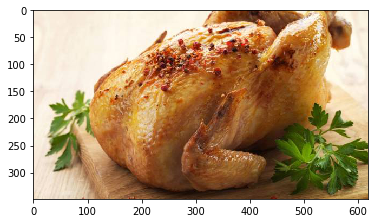

In [23]:
plt.imshow(Pollo);

In [24]:
def calentar(R,G,B,X):
    R += 1*X
    G += 0.25*X
    B -= 0.25*X
    if R > 255:
        R = 255
    if G > 255:
        G = 255
    if B < 0:
        B = 0
    R = int(R)
    G = int(G)
    B = int(B)
    return [R, G, B]

In [25]:
def enfriar(R,G,B):
    R -= 30
    G -= 15
    B += 75
    if B > 255:
        B = 255
    if R < 0:
        R = 0
    if G < 0:
        G = 0    
    return [R, G, B]

In [26]:
filas = len(Pollo); filas

349

In [27]:
columnas = len(Pollo[1]); columnas

619

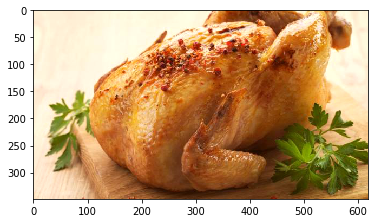

In [28]:
i = 0
n = 0
PolloCaliente = []
Columnas = []

while i < filas:
    PolloCaliente
    while n < columnas:
        Columnas.append(calentar(Pollo[i][n][0],Pollo[i][n][1],Pollo[i][n][2],20))
        n += 1   
    PolloCaliente.append(Columnas)
    Columnas = []
    i += 1
    n = 0
    plt.imshow(PolloCaliente);

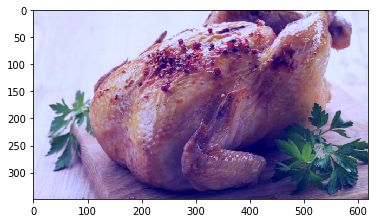

In [29]:
i = 0
n = 0
PolloFrio = []
Columnas = []
while i < filas:
    PolloCaliente
    while n < columnas:
        Columnas.append(enfriar(Pollo[i][n][0],Pollo[i][n][1],Pollo[i][n][2]))
        n += 1   
    PolloFrio.append(Columnas)
    Columnas = []
    i += 1
    n = 0
    plt.imshow(PolloFrio);

In [30]:
len(PolloCaliente)

349

In [31]:
print(Pollo[0][425])

[138  79  47]


In [32]:
print(PolloCaliente[0][425])

[158, 84, 42]


In [33]:
len(PolloFrio)

349

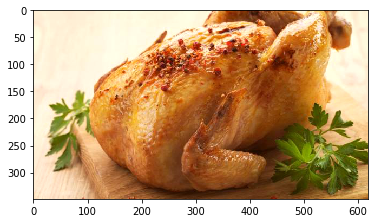

In [34]:
plt.imshow(PolloCaliente);

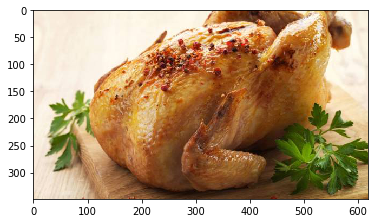

In [35]:
plt.imshow(Pollo);

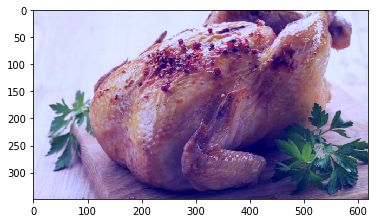

In [36]:
plt.imshow(PolloFrio);

In [37]:
import copy

In [38]:
PolloC = Pollo.copy()

In [39]:
Pollo.setflags(write = 1)

In [40]:
pictest = PolloC[:,:,0] < 220
PolloC[pictest] = [100,100,90]

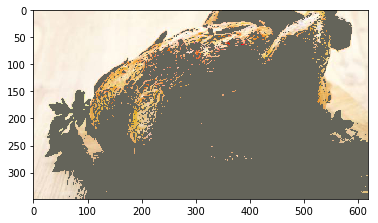

In [41]:
plt.imshow(PolloC)

In [42]:
#definir la ecuacion diferencial 
 
#a esta aplicar odeint y deben obtener los mismos valores a los obtenidos con sus definiciones anteriores. 
def temperatura(to,t):
    k = 0.022                      #Es la razon de cambio del pollo
    ta = 300                       #Es la temperatura del horno
    ans = -k*(to - ta)
    return ans
to= 1
t= np.linspace(0,50)
res=odeint(temperatura,to,t)
res[-1]

array([200.47154582])

In [43]:

def TemperaturaPollo(t = 1):
    #Editores de Imagen Pollo
    to = 1                      #Es la temperatura del objeto
    time = np.linspace(0,t)
    TP = odeint(temperatura,to,time)
    print("La temperatura del Pollo es: ",TP[-1], "grados")
    
    i = 0
    n = 0
    PolloCaliente = []
    Columnas = []
    while i < filas:
        PolloCaliente
        while n < columnas:
            Columnas.append(calentar(PolloFrio[i][n][0],PolloFrio[i][n][1],PolloFrio[i][n][2], TP[-1]))
            n += 1   
        PolloCaliente.append(Columnas)
        Columnas = []
        i += 1
        n = 0 
    plt.imshow(PolloCaliente);
    
    # Variables para formula temperatura en forma odeint
    
interact_manual(TemperaturaPollo, t = (0,60, 2))

interactive(children=(IntSlider(value=1, description='t', max=60, step=2), Button(description='Run Interact', …

<function __main__.TemperaturaPollo(t=1)>